In [2]:
import pandas as pd

In [3]:
# Replace 'marketing_social_media_dataset_v2.json' with your actual file name
file_path = "marketing_social_media_dataset_v2.json"

# Load the JSON file
df = pd.read_json(file_path)

# Display the first few rows
print(df.head())

                                         instruction  \
0  Develop a social media campaign to increase br...   
1  Create a content calendar for a B2B software c...   
2  Design a targeted email campaign to re-engage ...   
3  Create a social media campaign to increase bra...   
4  Design an email marketing campaign to nurture ...   

                                               input  \
0  Company: GreenCycle Clothing\nTarget Audience:...   
1  Company: NovaTech Solutions\nTarget Audience: ...   
2  Company: FitZone\nTarget Audience: Inactive su...   
3  Company: GreenThreads, a fashion brand using e...   
4  Company: Proxima, a SaaS provider for marketin...   

                                            response  
0  "Revolutionize Your Wardrobe" campaign, levera...  
1  "AI Insights" series, covering topics like AI ...  
2  "Get Moving Again" campaign, featuring a 3-ema...  
3  Develop a social media campaign highlighting G...  
4  Create a 5-email nurture sequence: Introductio..

In [4]:
# Save the JSON dataset as a CSV for easier handling
df.to_csv("marketing_social_media_dataset_v2.csv", index=False)

In [5]:
# View column names and types
print(df.info())

# Basic statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  689 non-null    object
 1   input        689 non-null    object
 2   response     689 non-null    object
dtypes: object(3)
memory usage: 16.3+ KB
None
                                              instruction  \
count                                                 689   
unique                                                481   
top     Design an email marketing campaign to nurture ...   
freq                                                   28   

                                                    input  \
count                                                 689   
unique                                                689   
top     Company: GreenCycle Clothing\nTarget Audience:...   
freq                                                    1   

                                 

In [6]:
# Count the unique instructions
print("Number of unique instructions:", df['instruction'].nunique())
print("Top 5 most common instructions:")
print(df['instruction'].value_counts().head(5))

Number of unique instructions: 481
Top 5 most common instructions:
instruction
Design an email marketing campaign to nurture leads for a B2B software company.                                      28
Create a social media campaign to increase brand awareness among young adults for a sustainable fashion brand.       24
Create a social media campaign to increase brand awareness for a sustainable fashion brand among Gen Z consumers.    11
Create a social media campaign to increase brand awareness for a new eco-friendly fashion brand.                     11
Create a social media campaign to increase brand awareness among Gen Z for a sustainable fashion brand.              11
Name: count, dtype: int64


In [7]:
# Example of input data
print("Sample inputs:")
print(df['input'].head(5))

Sample inputs:
0    Company: GreenCycle Clothing\nTarget Audience:...
1    Company: NovaTech Solutions\nTarget Audience: ...
2    Company: FitZone\nTarget Audience: Inactive su...
3    Company: GreenThreads, a fashion brand using e...
4    Company: Proxima, a SaaS provider for marketin...
Name: input, dtype: object


In [8]:
# Example of responses
print("Sample responses:")
print(df['response'].head(5))

Sample responses:
0    "Revolutionize Your Wardrobe" campaign, levera...
1    "AI Insights" series, covering topics like AI ...
2    "Get Moving Again" campaign, featuring a 3-ema...
3    Develop a social media campaign highlighting G...
4    Create a 5-email nurture sequence: Introductio...
Name: response, dtype: object


In [9]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Replace newlines with space
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning to all columns
df['instruction'] = df['instruction'].apply(clean_text)
df['input'] = df['input'].apply(clean_text)
df['response'] = df['response'].apply(clean_text)

# Check cleaned data
print(df.head())

                                         instruction  \
0  Develop a social media campaign to increase br...   
1  Create a content calendar for a B2B software c...   
2  Design a targeted email campaign to re-engage ...   
3  Create a social media campaign to increase bra...   
4  Design an email marketing campaign to nurture ...   

                                               input  \
0  Company: GreenCycle Clothing Target Audience: ...   
1  Company: NovaTech Solutions Target Audience: B...   
2  Company: FitZone Target Audience: Inactive sub...   
3  Company: GreenThreads, a fashion brand using e...   
4  Company: Proxima, a SaaS provider for marketin...   

                                            response  
0  "Revolutionize Your Wardrobe" campaign, levera...  
1  "AI Insights" series, covering topics like AI ...  
2  "Get Moving Again" campaign, featuring a 3-ema...  
3  Develop a social media campaign highlighting G...  
4  Create a 5-email nurture sequence: Introductio..

In [101]:
# Add a column for response length
df['response_length'] = df['response'].apply(len)

# Calculate sentiment polarity for each response
from textblob import TextBlob
df['response_sentiment'] = df['response'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check if the columns are created
print(df[['response_length', 'response_sentiment']].head())

   response_length  response_sentiment
0              395            0.000000
1              340           -0.250000
2              394            0.115801
3              314            0.216667
4              252            0.033333


In [111]:
# Calculate the correlation between response length and sentiment polarity
correlation = df['response_length'].corr(df['response_sentiment'])

# Print the correlation value
print(f"Correlation between Response Length and Sentiment Polarity: {correlation:.2f}")

Correlation between Response Length and Sentiment Polarity: 0.04


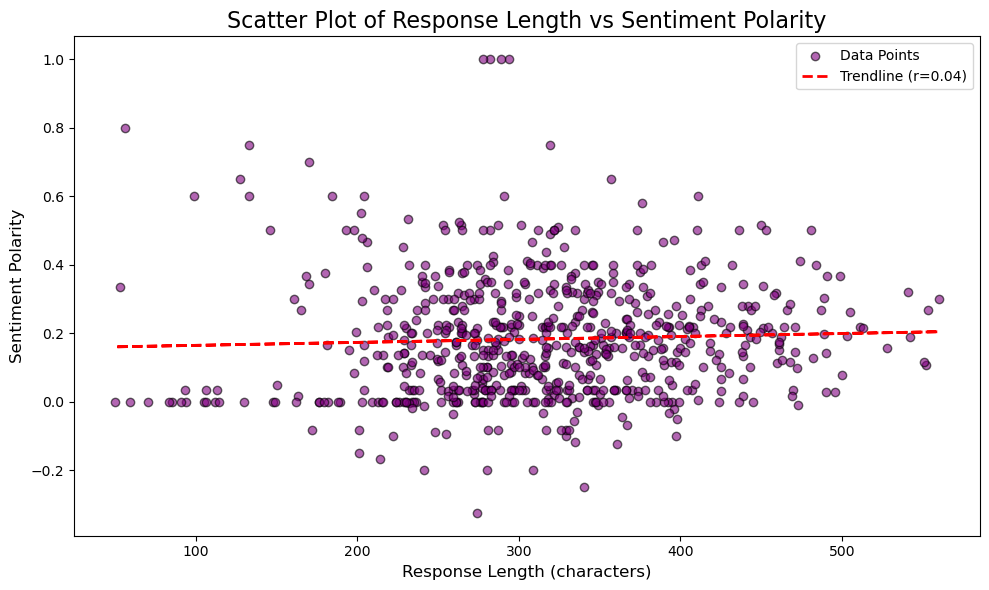

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of response length vs. sentiment polarity
plt.figure(figsize=(10, 6))
plt.scatter(df['response_length'], df['response_sentiment'], alpha=0.6, color='purple', edgecolor='black', label='Data Points')

# Calculate the trendline
z = np.polyfit(df['response_length'], df['response_sentiment'], 1)
p = np.poly1d(z)
plt.plot(df['response_length'], p(df['response_length']), color='red', linewidth=2, linestyle='--', label=f'Trendline (r=0.04)')  # Updated label

# Add titles and labels
plt.title("Scatter Plot of Response Length vs Sentiment Polarity", fontsize=16)
plt.xlabel("Response Length (characters)", fontsize=12)
plt.ylabel("Sentiment Polarity", fontsize=12)

# Add legend
plt.legend(loc='best', fontsize=10)

# Save the plot as a high-resolution image
plt.tight_layout()
plt.savefig("response_length_vs_sentiment_with_trendline.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

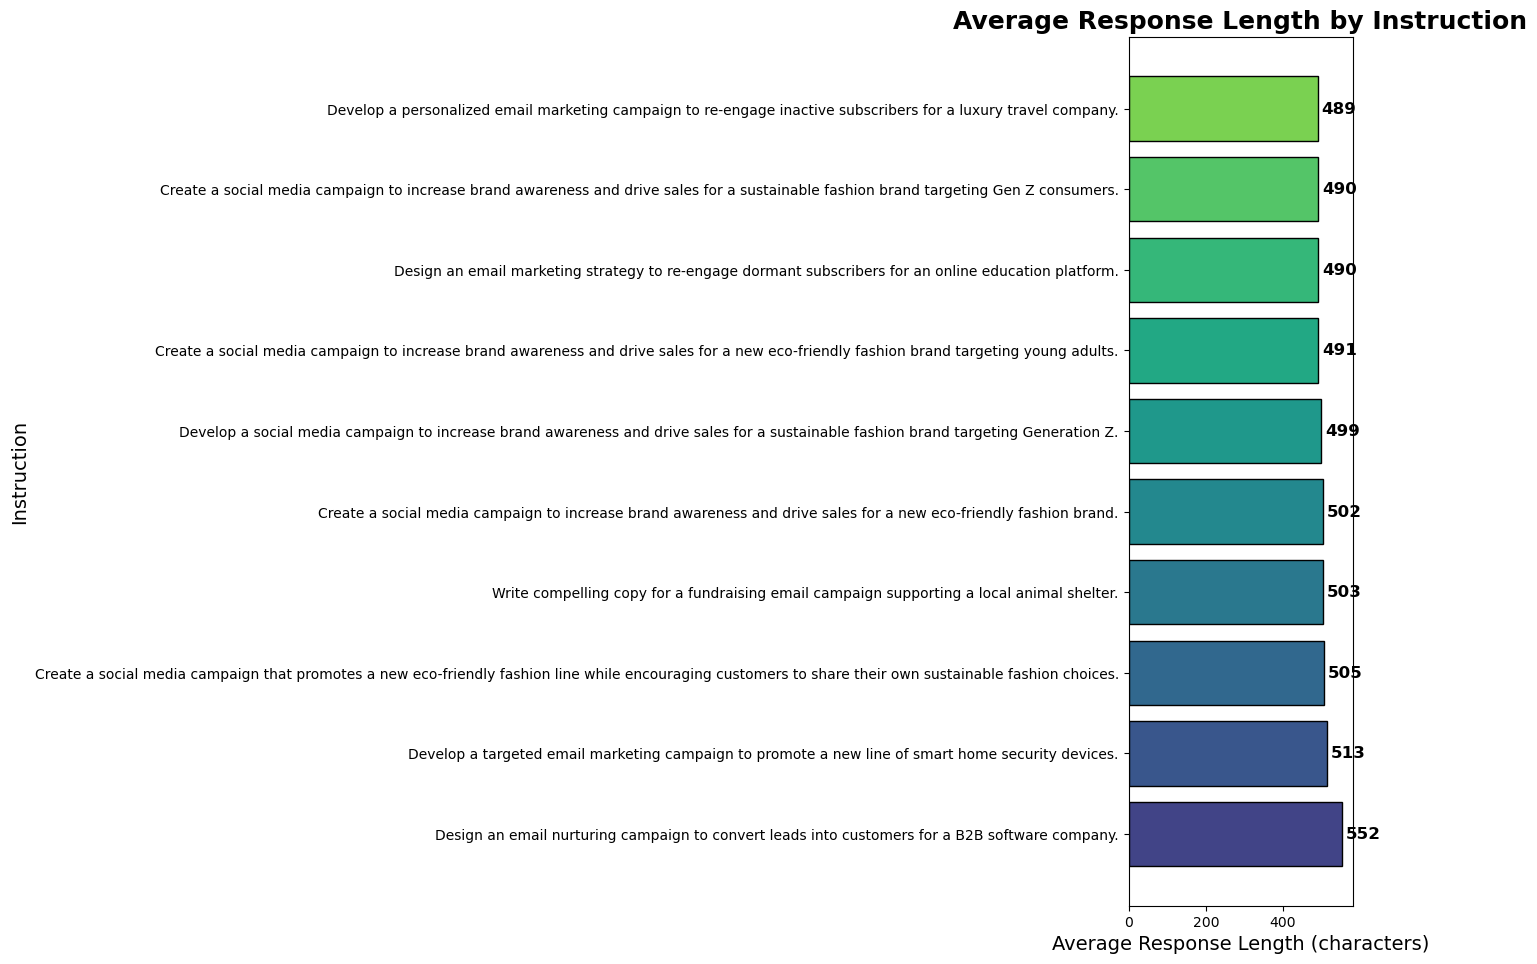

In [91]:
import numpy as np

# Generate a gradient color scheme
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(avg_response_length)))

# Plot
plt.figure(figsize=(14, 10))
plt.barh(avg_response_length.index, avg_response_length.values, color=colors, edgecolor='black')

# Add chart title and axis labels
plt.title("Average Response Length by Instruction", fontsize=18, weight='bold')
plt.xlabel("Average Response Length (characters)", fontsize=14)
plt.ylabel("Instruction", fontsize=14)

# Annotate each bar with its value
for index, value in enumerate(avg_response_length.values):
    plt.text(value + 10, index, f"{int(value)}", va='center', fontsize=12, color='black', weight='bold')

# Improve spacing
plt.tight_layout(pad=2.0)

# Save the plot as a high-resolution image
plt.savefig("gradient_response_length.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

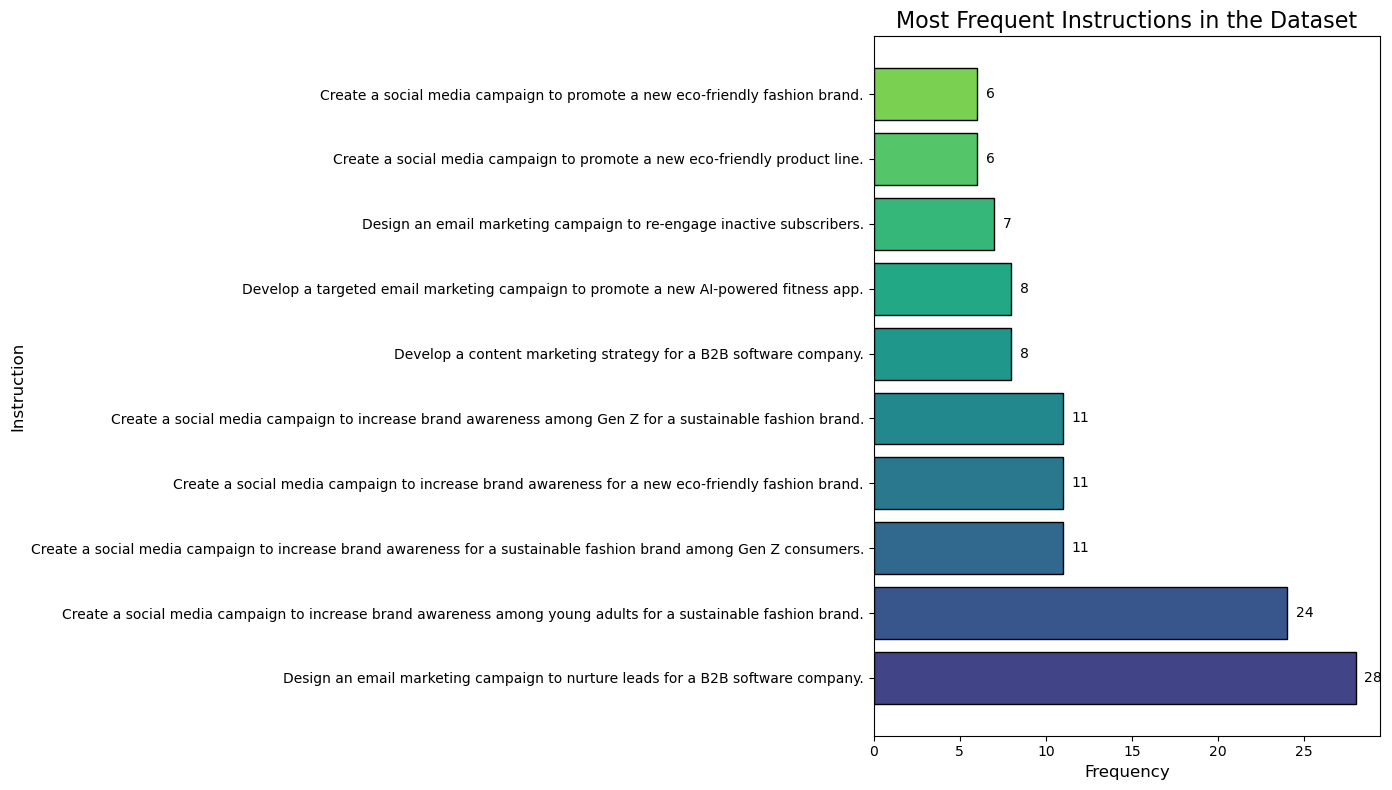

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a gradient color scheme for the first plot
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(instruction_counts)))

# Plot
plt.figure(figsize=(14, 8))  # Wider figure for better readability
plt.barh(instruction_counts.index, instruction_counts.values, color=colors, edgecolor='black')

# Add chart title and axis labels
plt.title("Most Frequent Instructions in the Dataset", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Instruction", fontsize=12)

# Annotate each bar with its frequency value
for index, value in enumerate(instruction_counts.values):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)  # Offset the text slightly to the right

# Ensure layout is tight and fits properly
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig("most_frequent_instructions_with_gradient.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

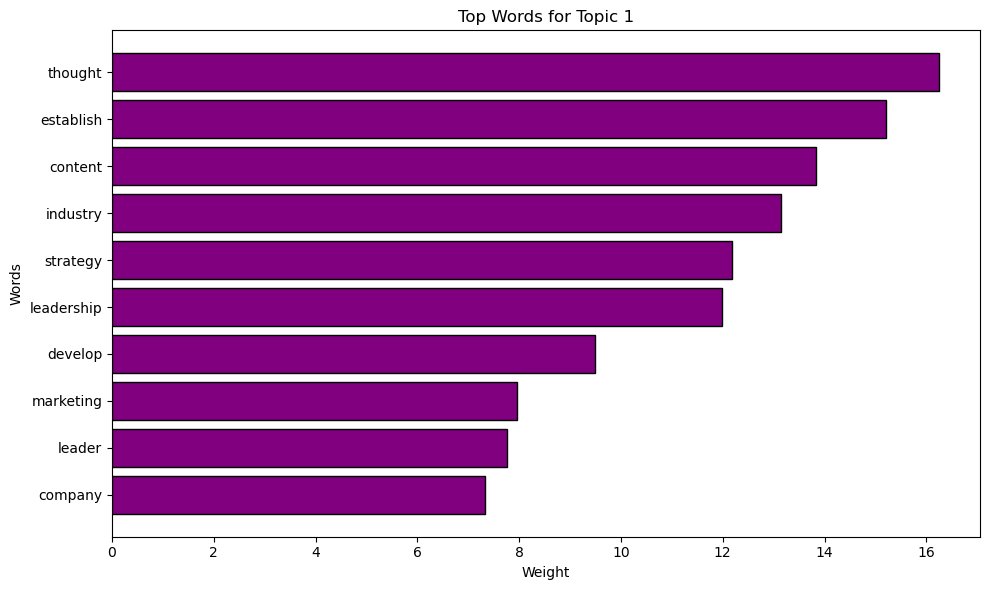

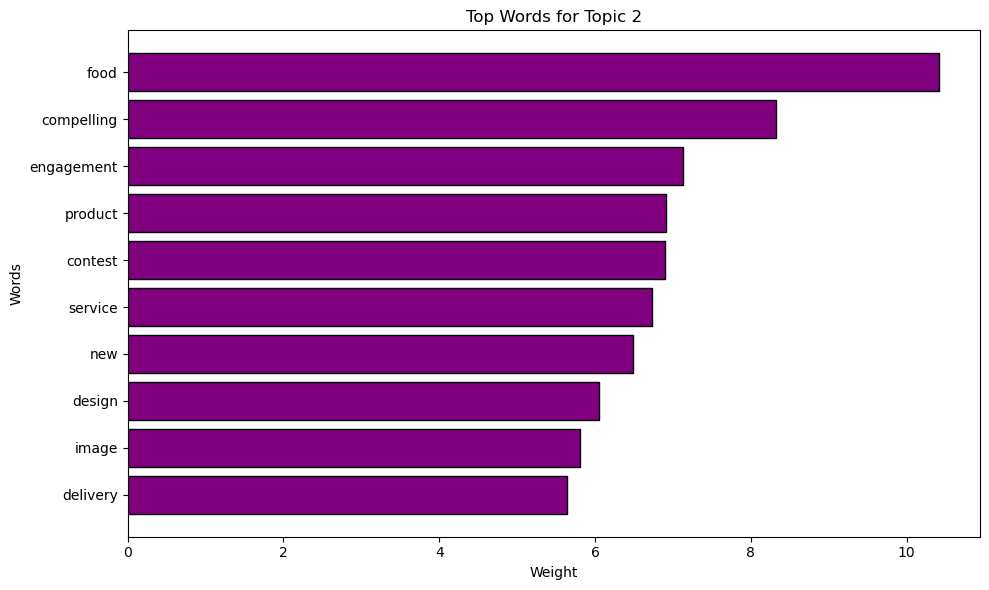

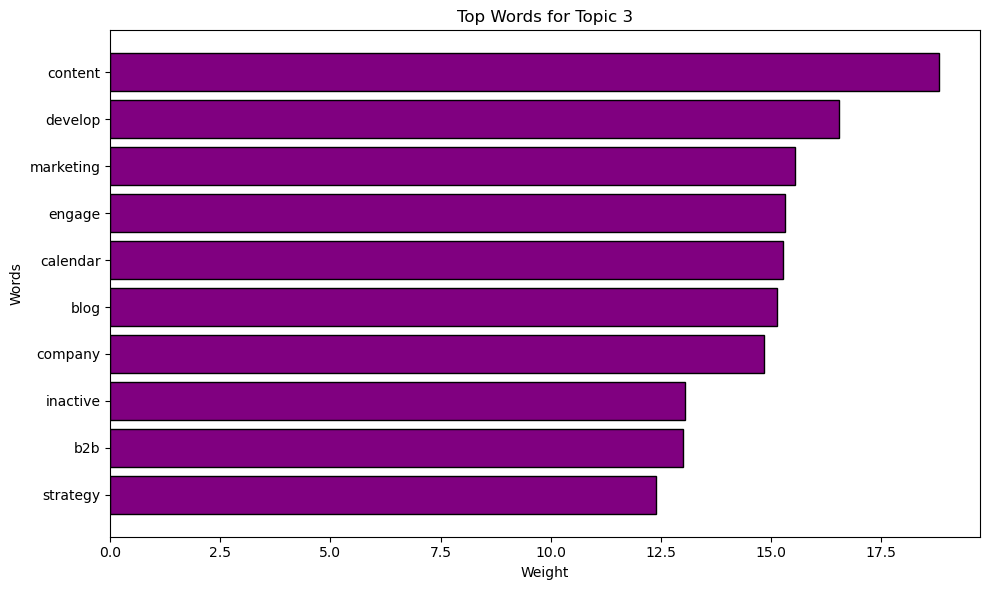

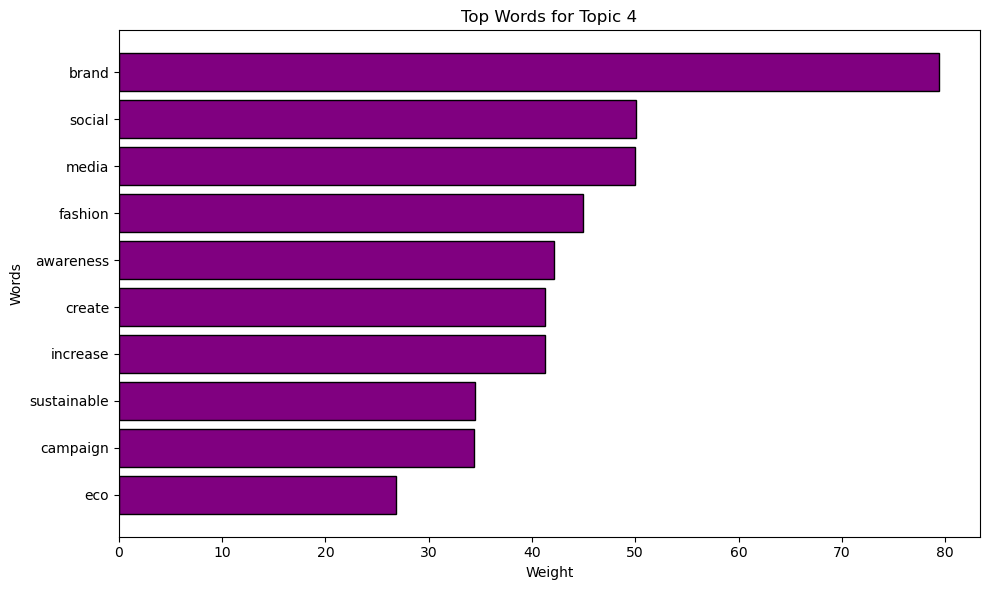

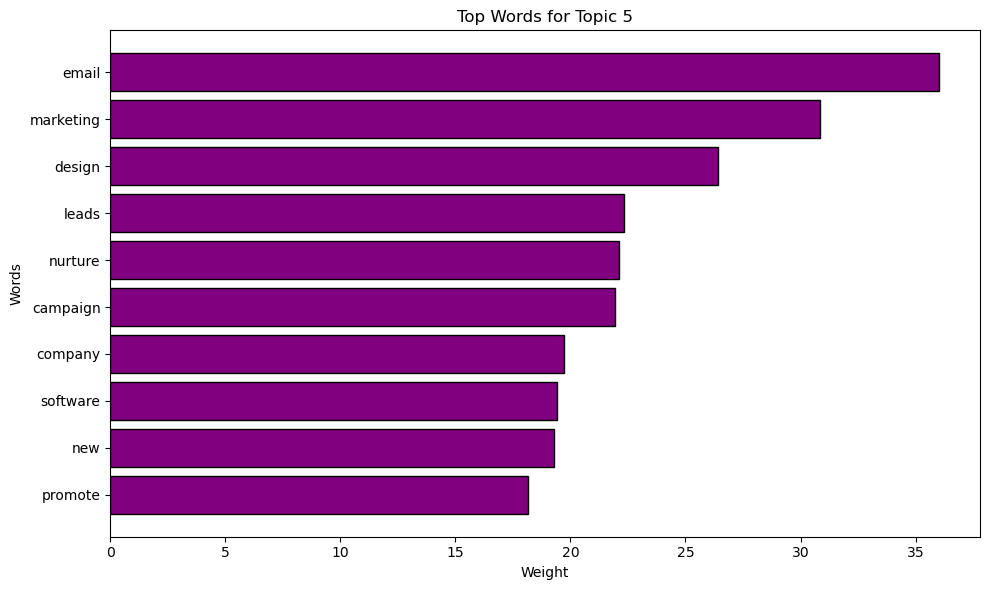

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the instruction column
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['instruction'])

# Fit an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

import matplotlib.pyplot as plt

# Visualize LDA topics
n_top_words = 10
for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_top_words:]]
    top_weights = topic[topic.argsort()[-n_top_words:]]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_weights, color='purple', edgecolor='black')
    plt.title(f"Top Words for Topic {idx + 1}")
    plt.xlabel("Weight")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.savefig(f"lda_topic_{idx + 1}.png", dpi=300, bbox_inches='tight')
    plt.show()

In [13]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


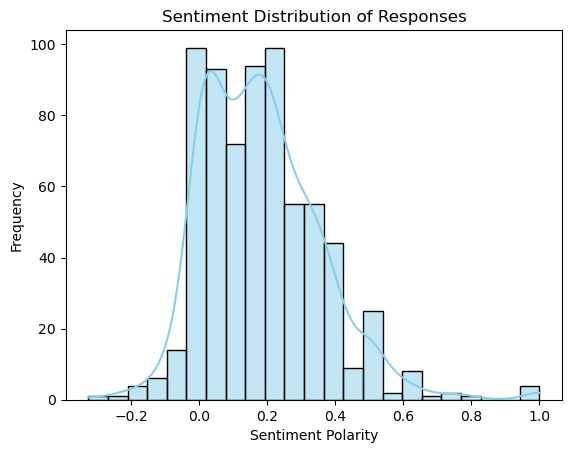

In [14]:
from textblob import TextBlob

# Calculate sentiment polarity for each response
df['response_sentiment'] = df['response'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['response_sentiment'], kde=True, color='skyblue')
plt.title("Sentiment Distribution of Responses")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Group instructions by their average sentiment
average_sentiment = df.groupby('instruction')['response_sentiment'].mean().sort_values(ascending=False)

# Display the top 5 instructions with the most positive sentiment
print("Top 5 Instructions with the Highest Sentiment:")
print(average_sentiment.head(5))

# Display the top 5 instructions with the lowest sentiment
print("\nTop 5 Instructions with the Lowest Sentiment:")
print(average_sentiment.tail(5))

Top 5 Instructions with the Highest Sentiment:
instruction
Develop a content marketing strategy to establish a B2B software company as a thought leader in the AI industry.            1.000000
Create a paid advertising campaign to drive sales for an e-commerce platform specializing in outdoor gear and equipment.    0.800000
Develop a content calendar for a B2B software company to establish thought leadership in the industry.                      0.758333
Develop a referral program to increase customer loyalty.                                                                    0.750000
Develop a content marketing strategy for a B2B software company to establish thought leadership in the industry.            0.700000
Name: response_sentiment, dtype: float64

Top 5 Instructions with the Lowest Sentiment:
instruction
Design an email marketing campaign to promote a new product launch for a tech startup.                                    -0.146344
Design a targeted email marketing campaign t

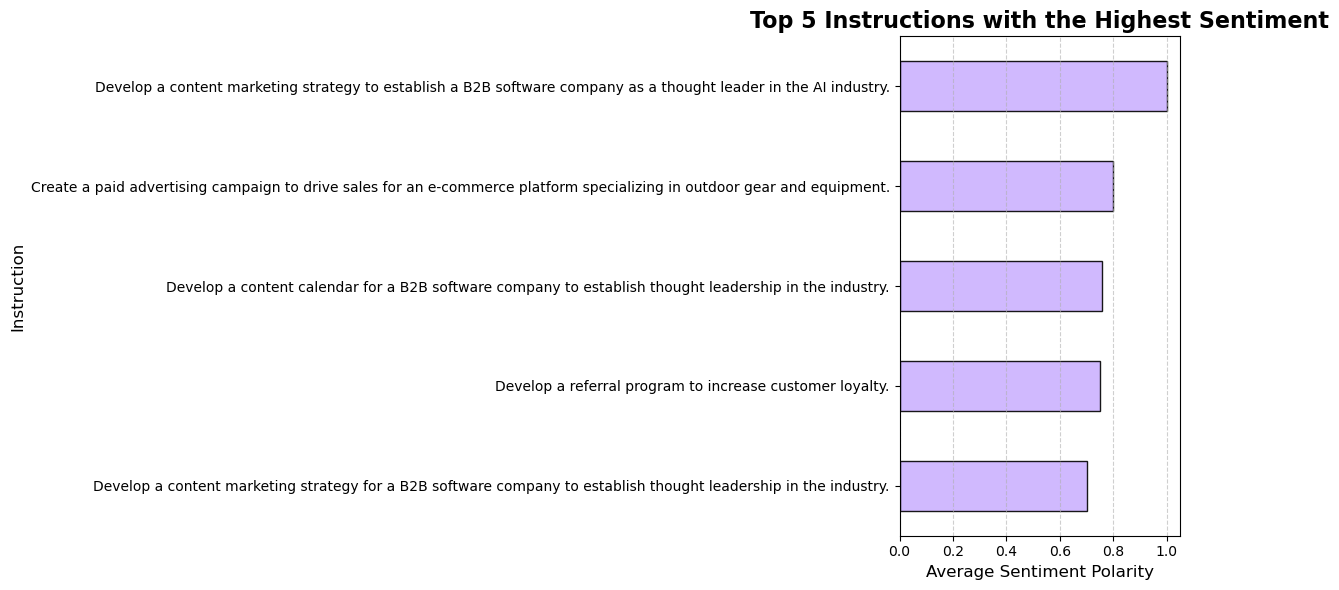

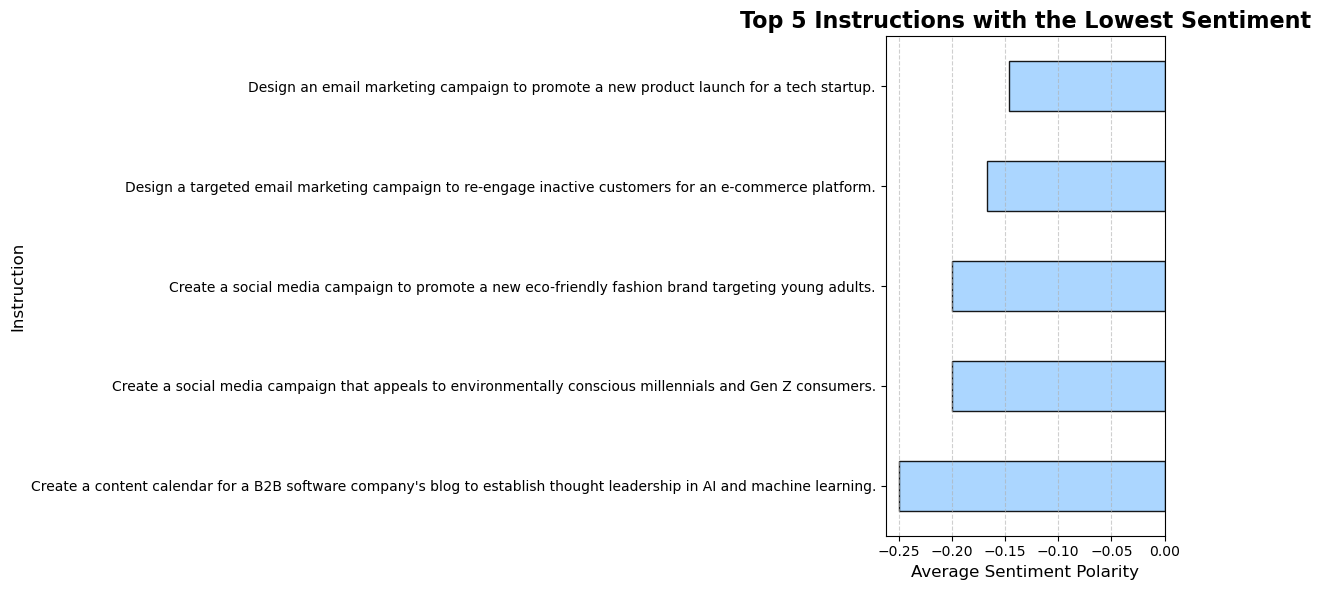

In [140]:
import matplotlib.pyplot as plt

# Refined visualization function for highest and lowest sentiment instructions
def plot_sentiment_instructions(data, title, color, filename):
    plt.figure(figsize=(12, 6))
    data.plot(kind='barh', color=color, edgecolor='black', alpha=0.9)
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel("Average Sentiment Polarity", fontsize=12)
    plt.ylabel("Instruction", fontsize=12)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Save the visualization as an image
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()

# Plot the highest sentiment instructions with light purple
plot_sentiment_instructions(
    highest_sentiment, 
    "Top 5 Instructions with the Highest Sentiment", 
    color='#CBB2FE',  # Light Purple
    filename="highest_sentiment_instructions.png"
)

# Plot the lowest sentiment instructions with light blue
plot_sentiment_instructions(
    lowest_sentiment, 
    "Top 5 Instructions with the Lowest Sentiment", 
    color='#A2D2FF',  # Light Blue
    filename="lowest_sentiment_instructions.png"
)

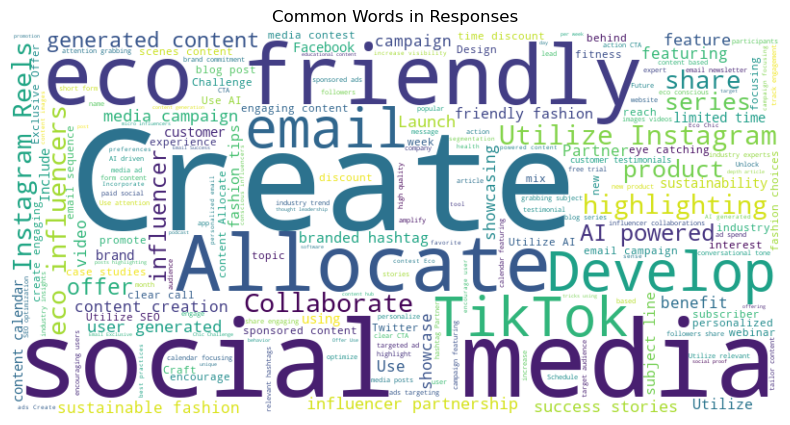

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all responses into a single string
text = ' '.join(df['response'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Responses")

# Save the word cloud as a PNG file
plt.savefig("wordcloud_common_responses.png", dpi=300, bbox_inches='tight')

# Display the word cloud
plt.show()

In [18]:
from sklearn.cluster import KMeans

# Fit KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['instruction_cluster'] = kmeans.fit_predict(X)

# Analyze clusters
print(df.groupby('instruction_cluster')['instruction'].apply(list))

instruction_cluster
0    [Design a targeted email campaign to re-engage...
1    [Develop a social media campaign to increase b...
2    [Write engaging copy for an email newsletter p...
3    [Design an email marketing campaign to nurture...
4    [Create a content calendar for a B2B software ...
Name: instruction, dtype: object


In [117]:
from sklearn.cluster import KMeans

# Fit KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['instruction_cluster'] = kmeans.fit_predict(X)

# Analyze clusters
print(df.groupby('instruction_cluster')['instruction'].apply(list))

# Step 1: Calculate Metrics for Clusters
avg_length_by_cluster = df.groupby('instruction_cluster')['response_length'].mean()
cluster_sentiment = df.groupby('instruction_cluster')['response_sentiment'].mean()

print("Average Response Length by Cluster:")
print(avg_length_by_cluster)

print("Average Sentiment Polarity by Cluster:")
print(cluster_sentiment)

# Combine metrics into a summary table
cluster_metrics = pd.DataFrame({
    'Average Sentiment': cluster_sentiment,
    'Average Response Length': avg_length_by_cluster
})
print("Cluster Metrics Summary:")
print(cluster_metrics)

# Save as a CSV for reference
cluster_metrics.to_csv("cluster_metrics_summary.csv", index=True)

instruction_cluster
0    [Design a targeted email campaign to re-engage...
1    [Develop a social media campaign to increase b...
2    [Write engaging copy for an email newsletter p...
3    [Design an email marketing campaign to nurture...
4    [Create a content calendar for a B2B software ...
Name: instruction, dtype: object
Average Response Length by Cluster:
instruction_cluster
0    326.363636
1    366.575419
2    319.500000
3    324.060241
4    286.958333
Name: response_length, dtype: float64
Average Sentiment Polarity by Cluster:
instruction_cluster
0    0.127085
1    0.202097
2    0.156949
3    0.210775
4    0.174655
Name: response_sentiment, dtype: float64
Cluster Metrics Summary:
                     Average Sentiment  Average Response Length
instruction_cluster                                            
0                             0.127085               326.363636
1                             0.202097               366.575419
2                             0.156949         

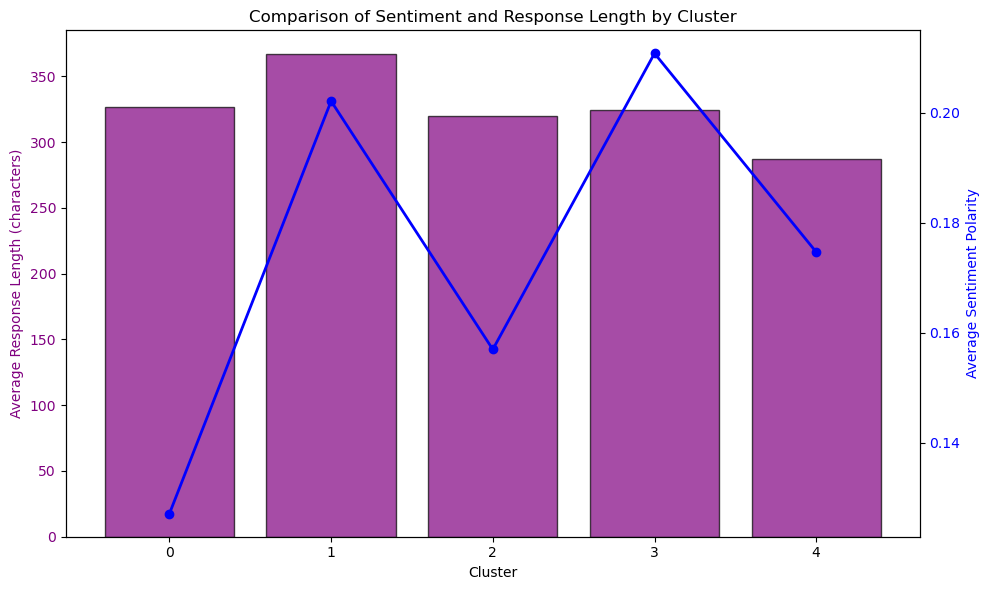

In [136]:
import matplotlib.pyplot as plt

# Create a visual summary
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot response length on the first y-axis
ax1.bar(cluster_metrics.index, cluster_metrics['Average Response Length'], color='purple', alpha=0.7, edgecolor='black')
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Average Response Length (characters)", color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Create a second y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(cluster_metrics.index, cluster_metrics['Average Sentiment'], color='blue', marker='o', linewidth=2)
ax2.set_ylabel("Average Sentiment Polarity", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add titles and legends
plt.title("Comparison of Sentiment and Response Length by Cluster")
fig.tight_layout()
plt.savefig("sentiment_response_comparison.png", dpi=300)
plt.show()

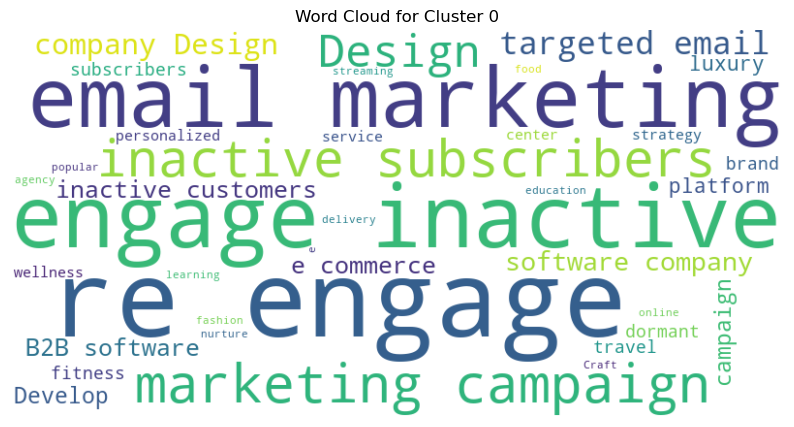

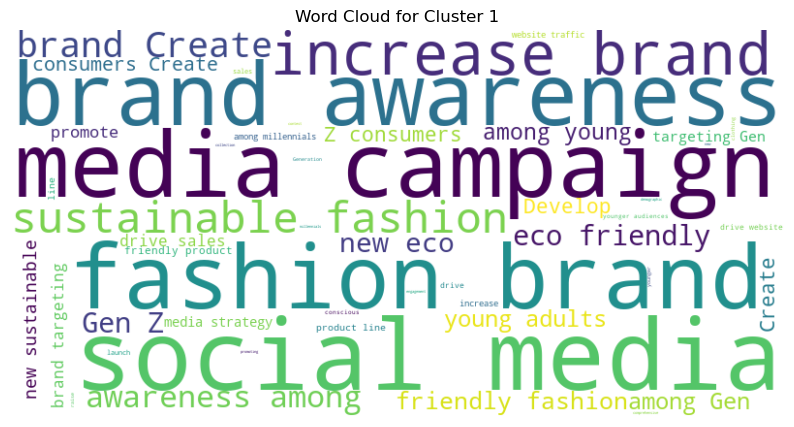

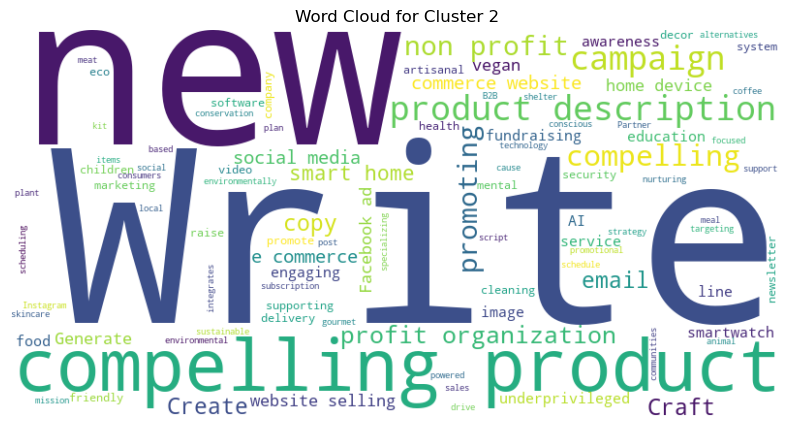

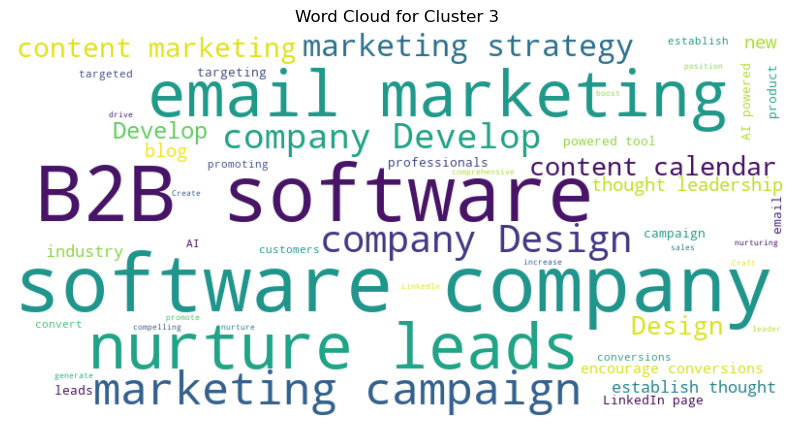

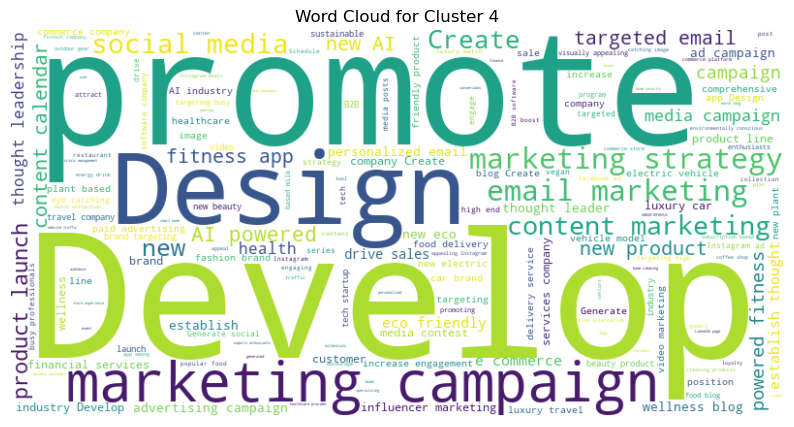

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cluster in range(5):  # Loop through each cluster
    # Combine all instructions in the current cluster into a single string
    cluster_text = ' '.join(df[df['instruction_cluster'] == cluster]['instruction'])
    
    # Generate the word cloud for the current cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster}")
    
    # Save the word cloud as a PNG file
    plt.savefig(f"wordcloud_cluster_{cluster}.png", dpi=300, bbox_inches='tight')
    
    # Display the word cloud
    plt.show()
    
    # Close the figure to avoid overlap in the next iteration
    plt.close()

In [20]:
df['response_length'] = df['response'].apply(len)
avg_length_by_cluster = df.groupby('instruction_cluster')['response_length'].mean()
print(avg_length_by_cluster)

# Calculate the average sentiment for each instruction cluster
cluster_sentiment = df.groupby('instruction_cluster')['response_sentiment'].mean()

# Display sentiment averages for clusters
print("Average sentiment polarity by cluster:")
print(cluster_sentiment)

instruction_cluster
0    326.363636
1    366.575419
2    319.500000
3    324.060241
4    286.958333
Name: response_length, dtype: float64
Average sentiment polarity by cluster:
instruction_cluster
0    0.127085
1    0.202097
2    0.156949
3    0.210775
4    0.174655
Name: response_sentiment, dtype: float64


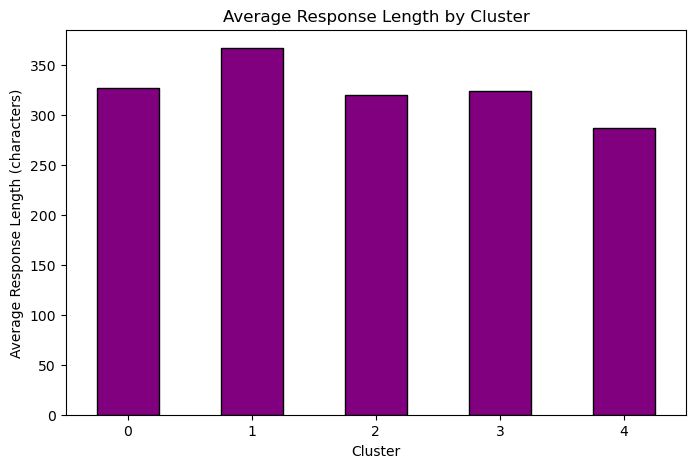

In [21]:
import matplotlib.pyplot as plt

# Plot response lengths by cluster
avg_length_by_cluster.plot(kind='bar', color='purple', edgecolor='black', figsize=(8, 5))
plt.title("Average Response Length by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Response Length (characters)")
plt.xticks(rotation=0)
plt.show()

In [22]:
# Display full instructions for each cluster
for cluster in range(5):  # Assuming 5 clusters
    print(f"\nCluster {cluster} Instructions:")
    print("\n".join(df[df['instruction_cluster'] == cluster]['instruction'].values[:10]))  # Display first 10 instructions


Cluster 0 Instructions:
Design a targeted email campaign to re-engage inactive subscribers for a fitness and wellness center.
Design an email marketing campaign to re-engage inactive subscribers for a B2B software company.
Design a targeted email marketing campaign to re-engage inactive customers for a luxury travel company.
Design a targeted email campaign to re-engage inactive subscribers for an e-commerce company.
Design an email marketing strategy to re-engage dormant subscribers for an online education platform.
Design an email marketing campaign to re-engage inactive subscribers.
Design a targeted email marketing campaign to re-engage inactive subscribers for a B2B software company.
Design an email marketing campaign to re-engage inactive subscribers.
Design an email marketing campaign to re-engage inactive subscribers.
Design an email marketing strategy to re-engage inactive subscribers for a B2B software company.

Cluster 1 Instructions:
Develop a social media campaign to incr

In [45]:
print(df.columns)

Index(['instruction', 'input', 'response', 'response_length',
       'response_sentiment', 'instruction_cluster'],
      dtype='object')


In [47]:
print("Number of rows in the dataset:", len(df))

Number of rows in the dataset: 689


In [49]:
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (689, 6)


In [51]:
# Calculate average sentiment polarity for each instruction cluster
cluster_sentiment = df.groupby('instruction_cluster')['response_sentiment'].mean()

# Print the average sentiment polarity for each cluster
print("Average sentiment polarity by cluster:")
print(cluster_sentiment)

Average sentiment polarity by cluster:
instruction_cluster
0    0.127085
1    0.202097
2    0.156949
3    0.210775
4    0.174655
Name: response_sentiment, dtype: float64


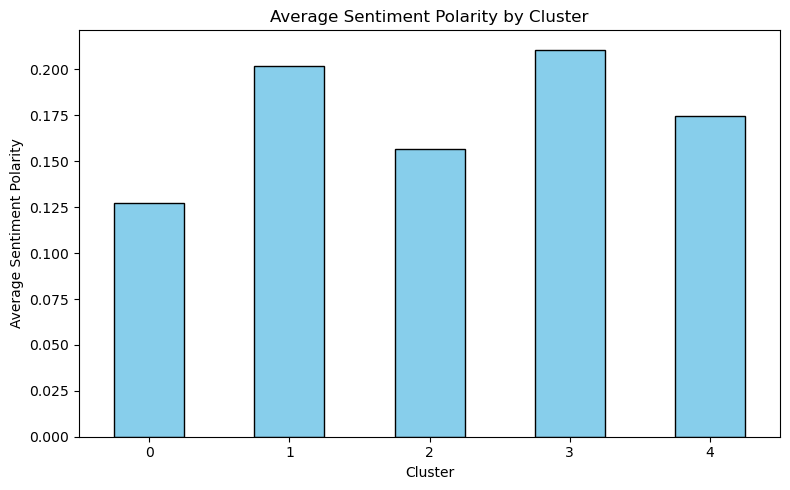

In [53]:
import matplotlib.pyplot as plt

# Bar chart for average sentiment polarity by cluster
cluster_sentiment.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title("Average Sentiment Polarity by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("sentiment_by_cluster.png", dpi=300)
plt.show()

In [103]:
print(df.columns)


Index(['instruction', 'input', 'response', 'response_length',
       'response_sentiment', 'instruction_cluster'],
      dtype='object')


In [105]:
df.to_csv("updated_dataset.csv", index=False)

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Loop through each cluster and perform topic modeling
for cluster in range(5):  # Assuming 5 clusters
    print(f"\nCluster {cluster}: Topic Modeling")
    
    # Combine all instructions for the cluster into a single string
    cluster_text = df[df['instruction_cluster'] == cluster]['instruction']
    
    # Convert text data into a document-term matrix
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Adjust max_features if needed
    X = vectorizer.fit_transform(cluster_text)
    
    # Fit LDA model to the cluster's instructions
    lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics per cluster (adjustable)
    lda.fit(X)
    
    # Display the top words for each topic in the cluster
    for idx, topic in enumerate(lda.components_):
        print(f"Topic {idx+1}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])  # Top 10 words


Cluster 0: Topic Modeling
Topic 1:
['platform', 'luxury', 'travel', 'design', 'strategy', 'dormant', 'email', 'engage', 'marketing', 'subscribers']
Topic 2:
['software', 'targeted', 'company', 'subscribers', 'marketing', 'design', 'campaign', 'inactive', 'engage', 'email']
Topic 3:
['engage', 'campaign', 'design', 'subscribers', 'targeted', 'brand', 'dormant', 'center', 'wellness', 'fitness']

Cluster 1: Topic Modeling
Topic 1:
['sustainable', 'new', 'increase', 'awareness', 'fashion', 'create', 'social', 'media', 'campaign', 'brand']
Topic 2:
['gen', 'fashion', 'create', 'sustainable', 'campaign', 'social', 'media', 'awareness', 'increase', 'brand']
Topic 3:
['eco', 'brand', 'fashion', 'strategy', 'consumers', 'gen', 'media', 'social', 'targeting', 'develop']

Cluster 2: Topic Modeling
Topic 1:
['ad', 'create', 'media', 'promoting', 'social', 'write', 'campaign', 'non', 'profit', 'organization']
Topic 2:
['engaging', 'line', 'campaign', 'newsletter', 'promoting', 'new', 'compelling',


Cluster 0: Topic Modeling


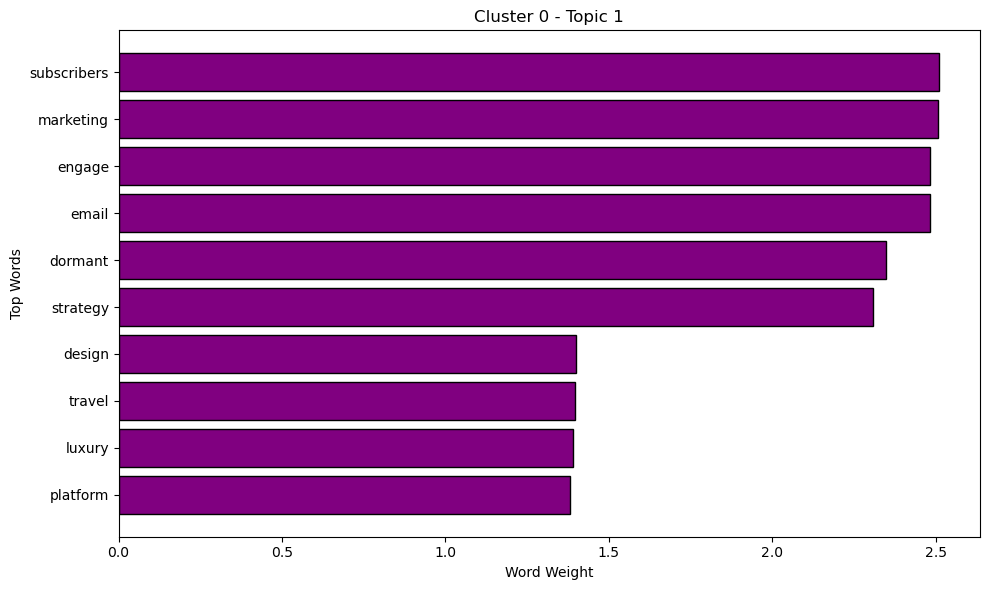

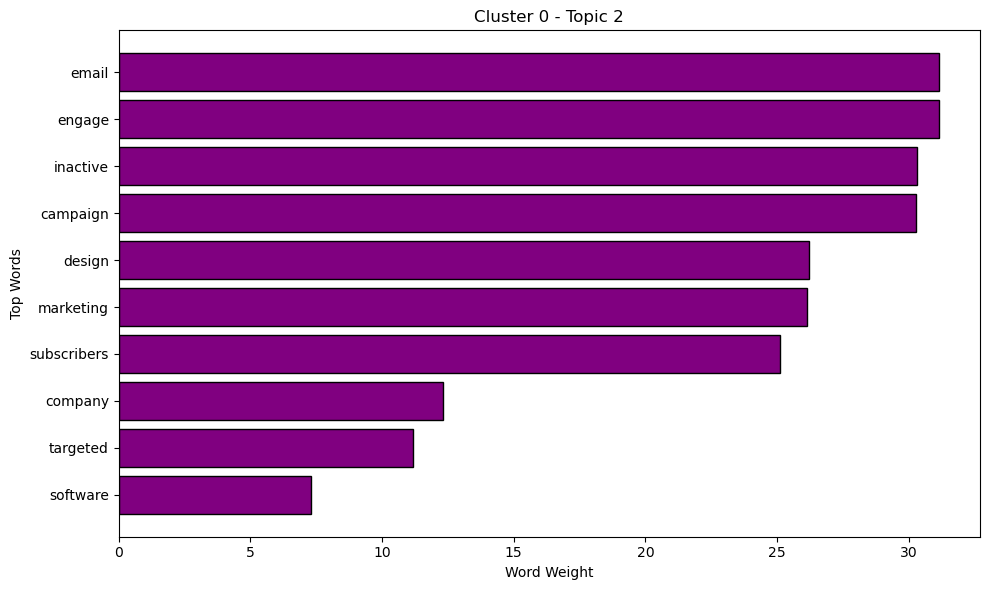

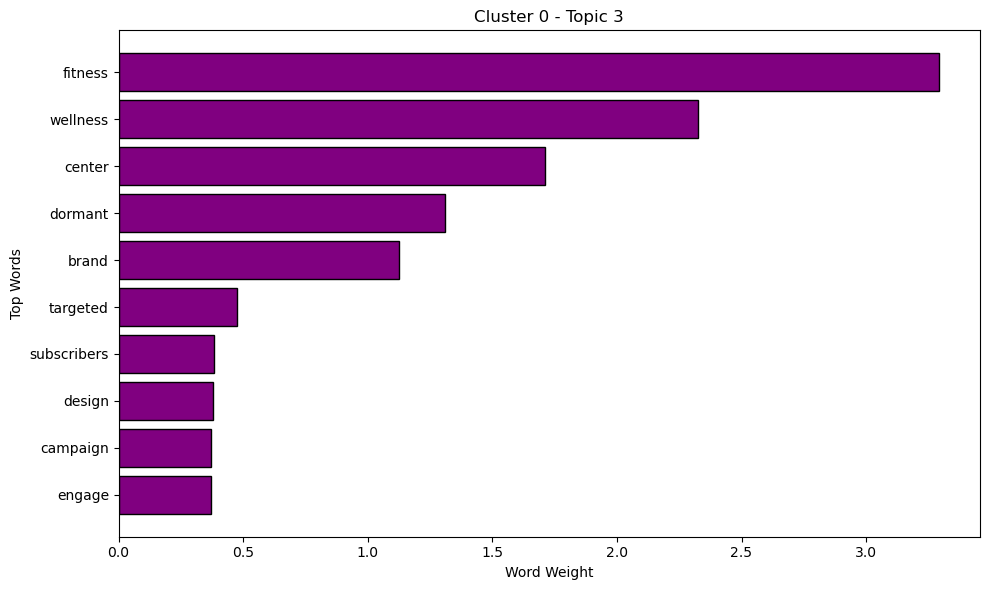


Cluster 1: Topic Modeling


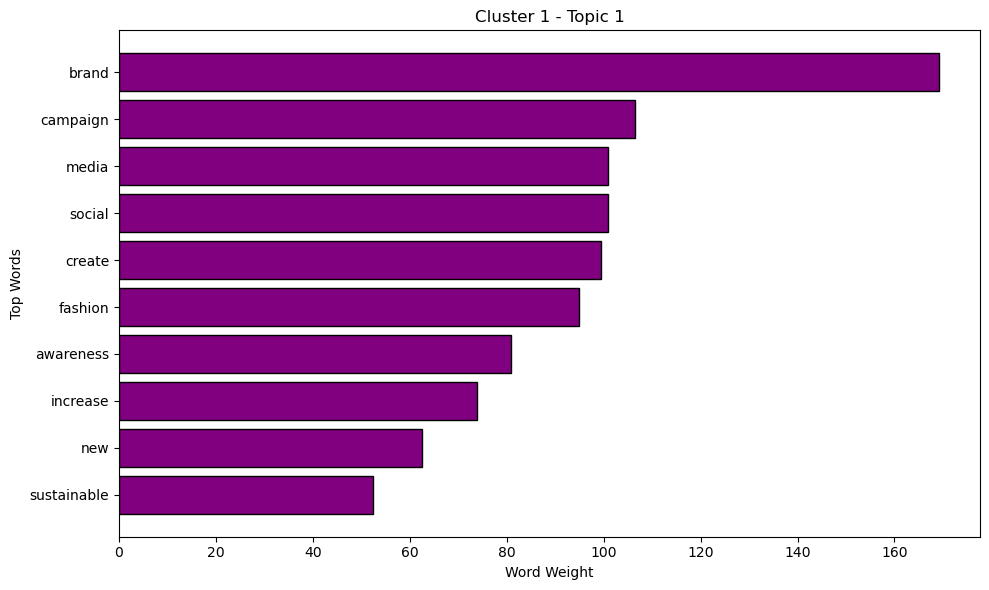

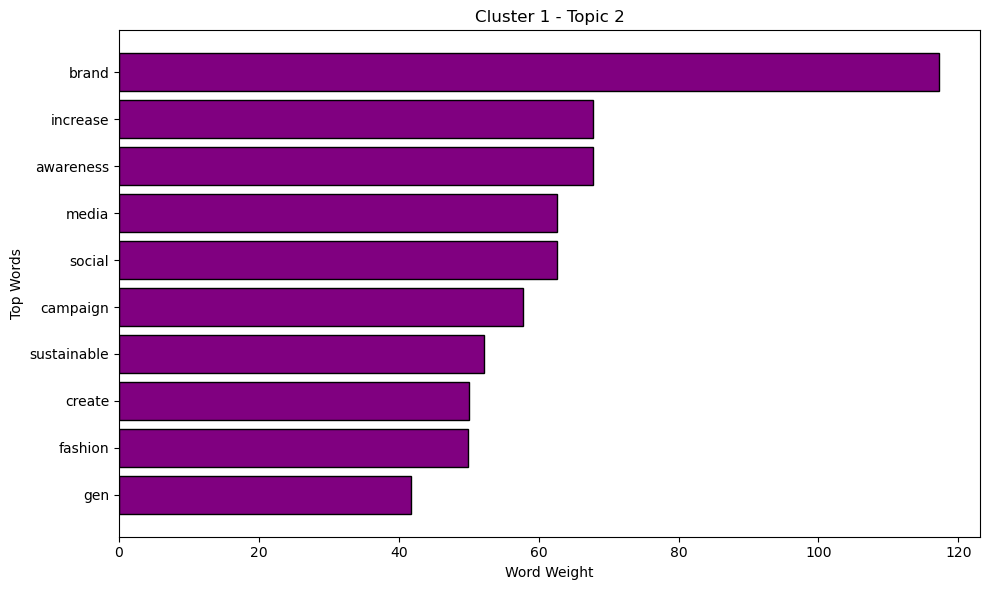

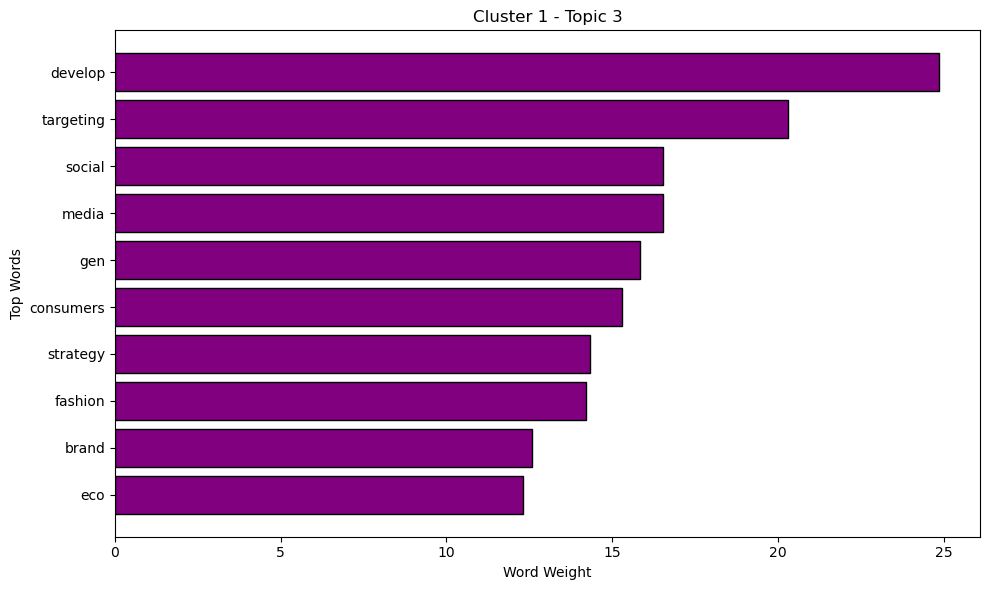


Cluster 2: Topic Modeling


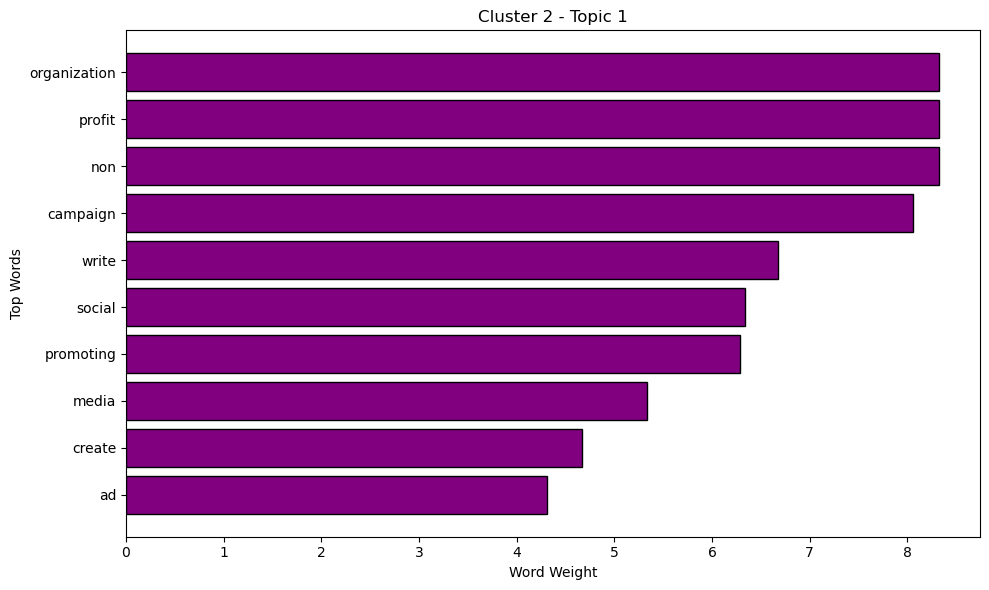

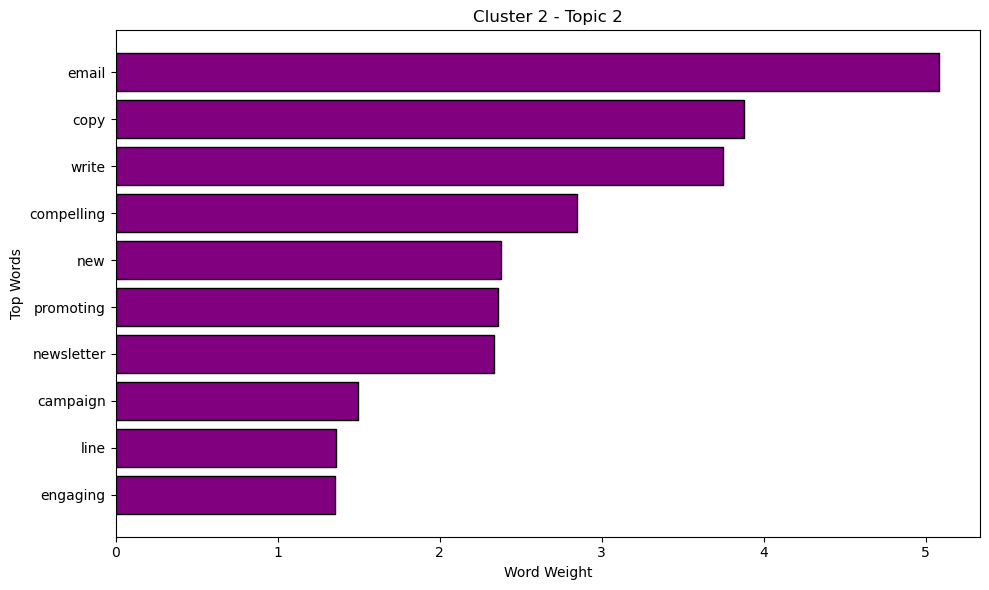

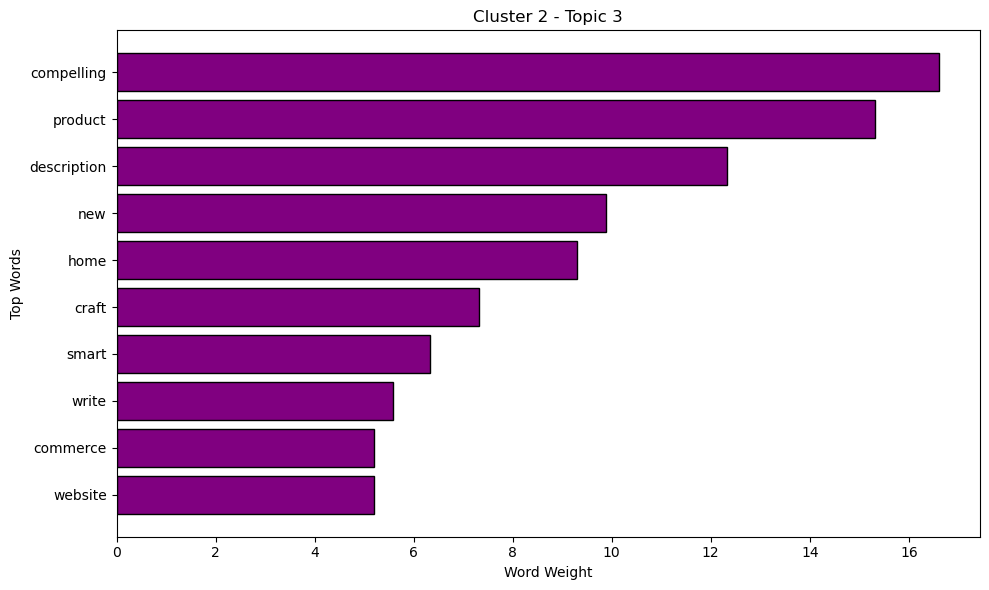


Cluster 3: Topic Modeling


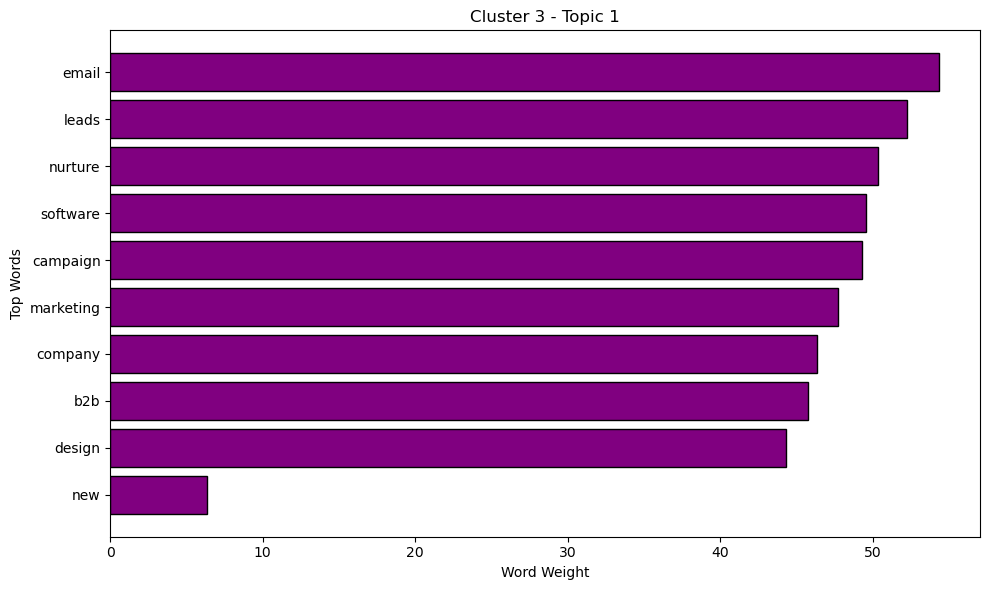

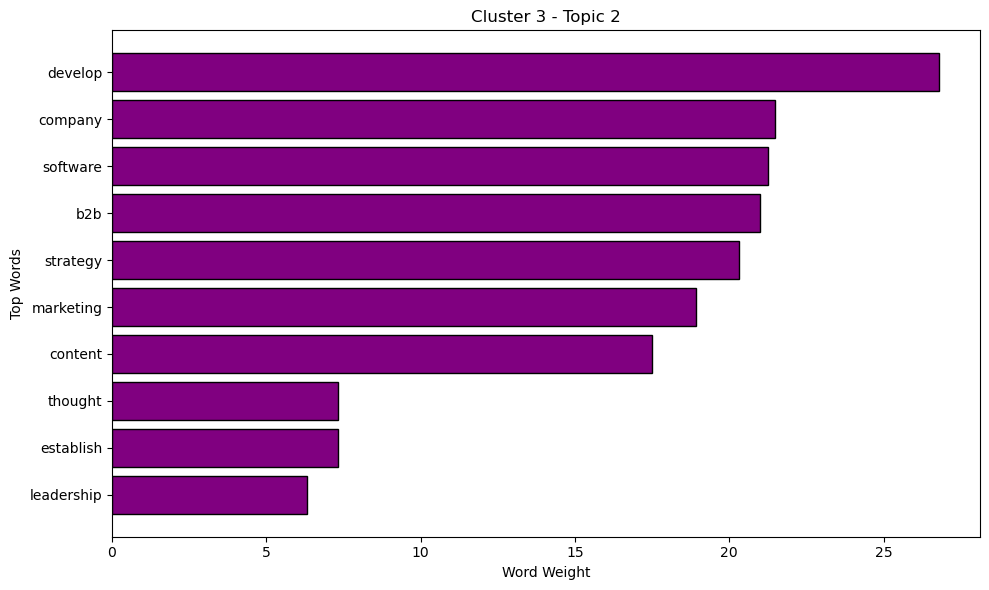

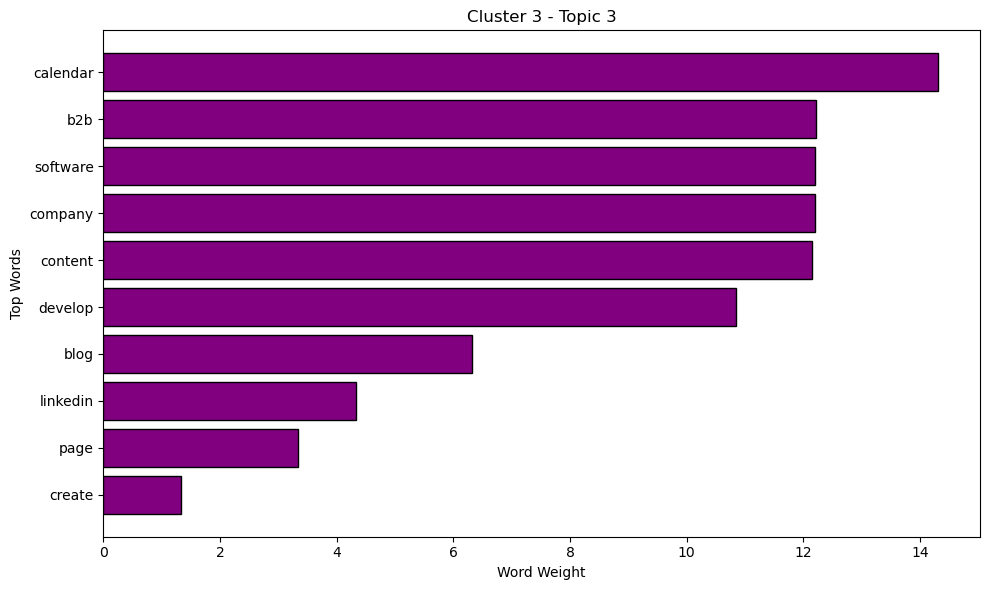


Cluster 4: Topic Modeling


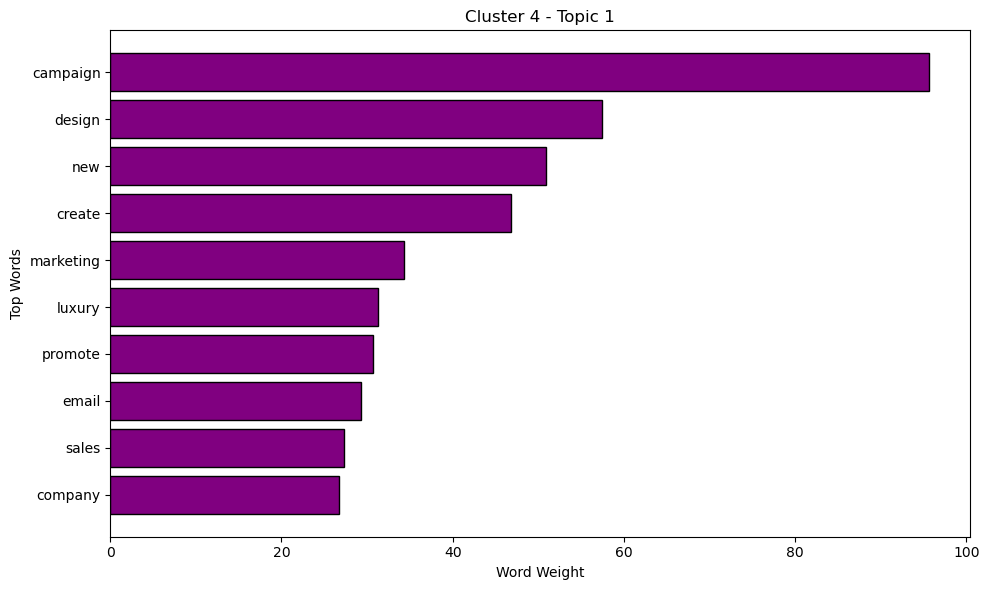

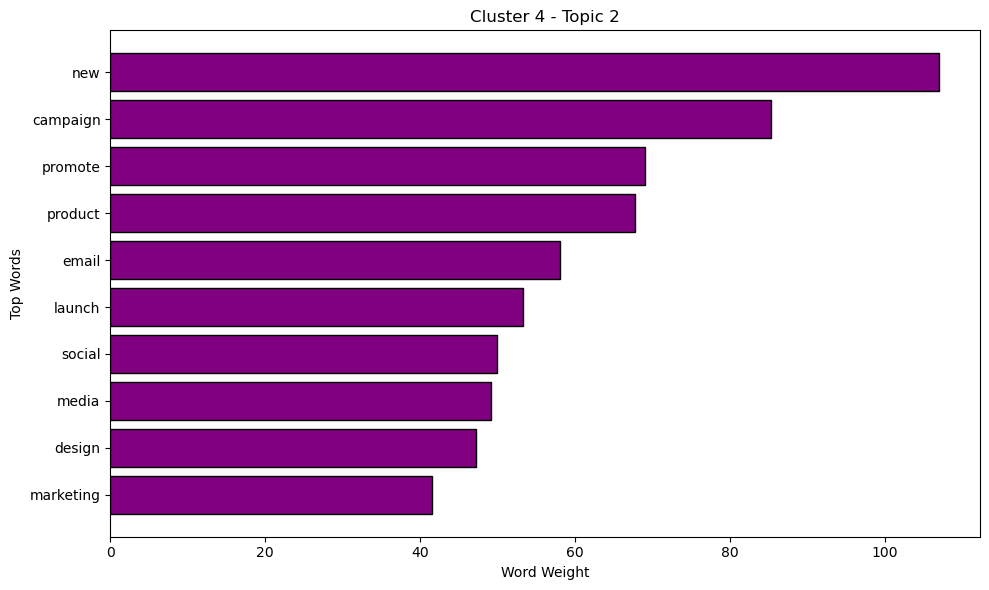

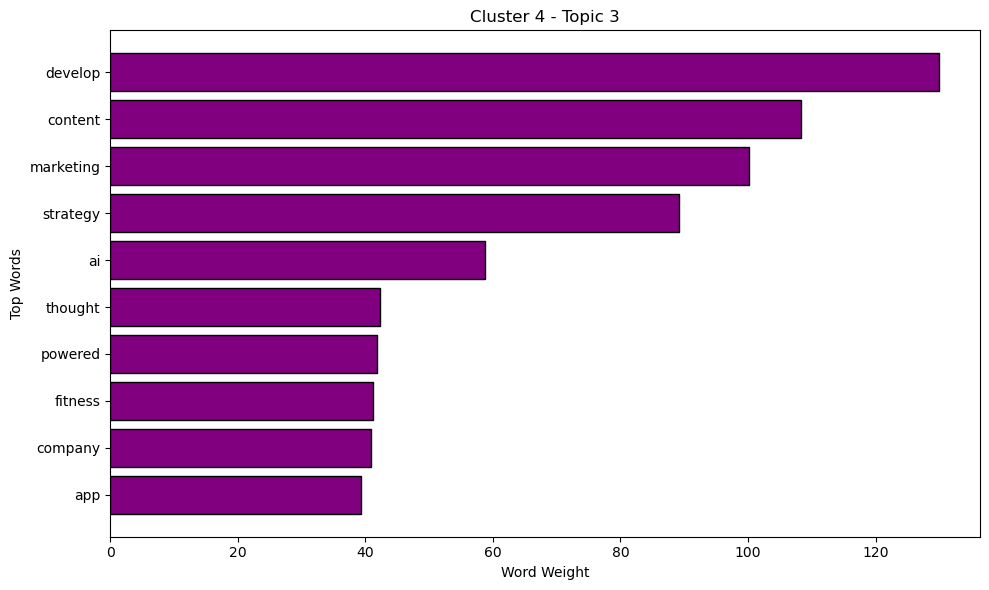

In [123]:
import matplotlib.pyplot as plt

# Loop through each cluster and perform topic modeling
for cluster in range(5):  # Assuming 5 clusters
    print(f"\nCluster {cluster}: Topic Modeling")
    
    # Combine all instructions for the cluster into a single string
    cluster_text = df[df['instruction_cluster'] == cluster]['instruction']
    
    # Convert text data into a document-term matrix
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Adjust max_features if needed
    X = vectorizer.fit_transform(cluster_text)
    
    # Fit LDA model to the cluster's instructions
    lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics per cluster (adjustable)
    lda.fit(X)
    
    # Visualize the top words for each topic in the cluster
    n_top_words = 10  # Number of top words to display
    for idx, topic in enumerate(lda.components_):
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_top_words:]]
        top_weights = topic[topic.argsort()[-n_top_words:]]
        
        # Create a horizontal bar chart for the topic
        plt.figure(figsize=(10, 6))
        plt.barh(top_words, top_weights, color='purple', edgecolor='black')
        plt.title(f"Cluster {cluster} - Topic {idx + 1}")
        plt.xlabel("Word Weight")
        plt.ylabel("Top Words")
        plt.tight_layout()
        
        # Save the visualization as a PNG file
        plt.savefig(f"cluster_{cluster}_topic_{idx + 1}.png", dpi=300, bbox_inches='tight')
        
        # Display the chart
        plt.show()


Cluster 0: Topic Modeling


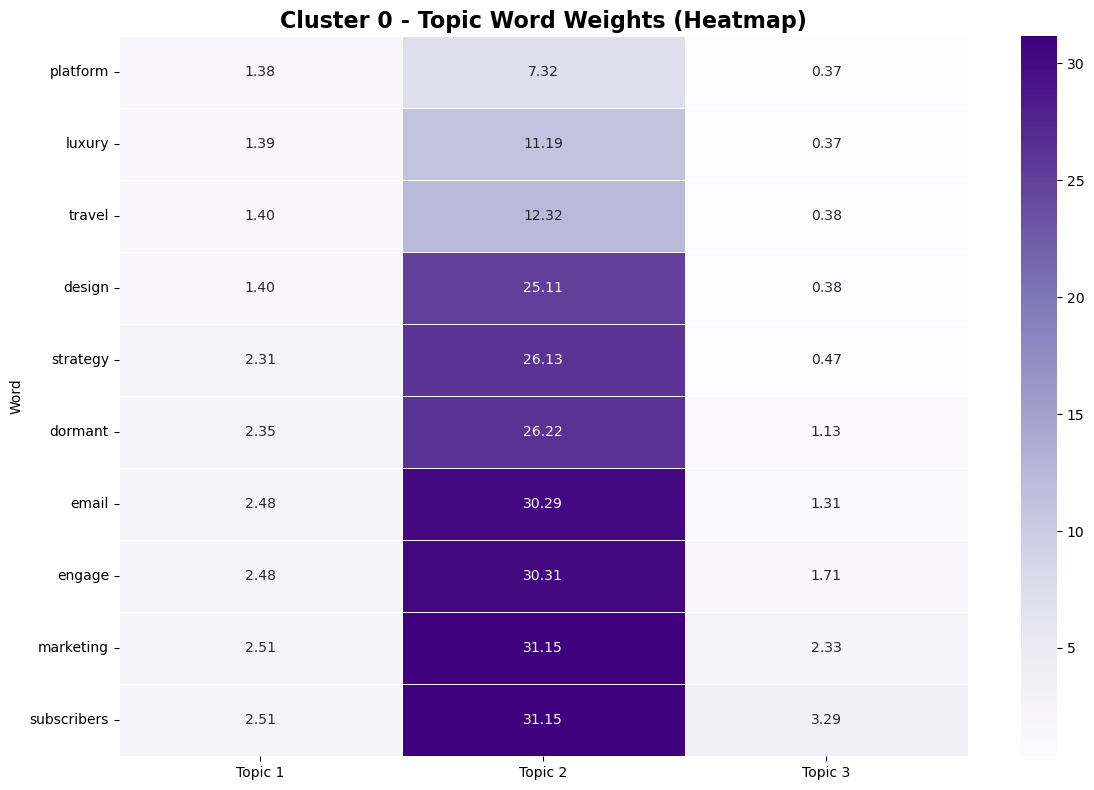


Cluster 1: Topic Modeling


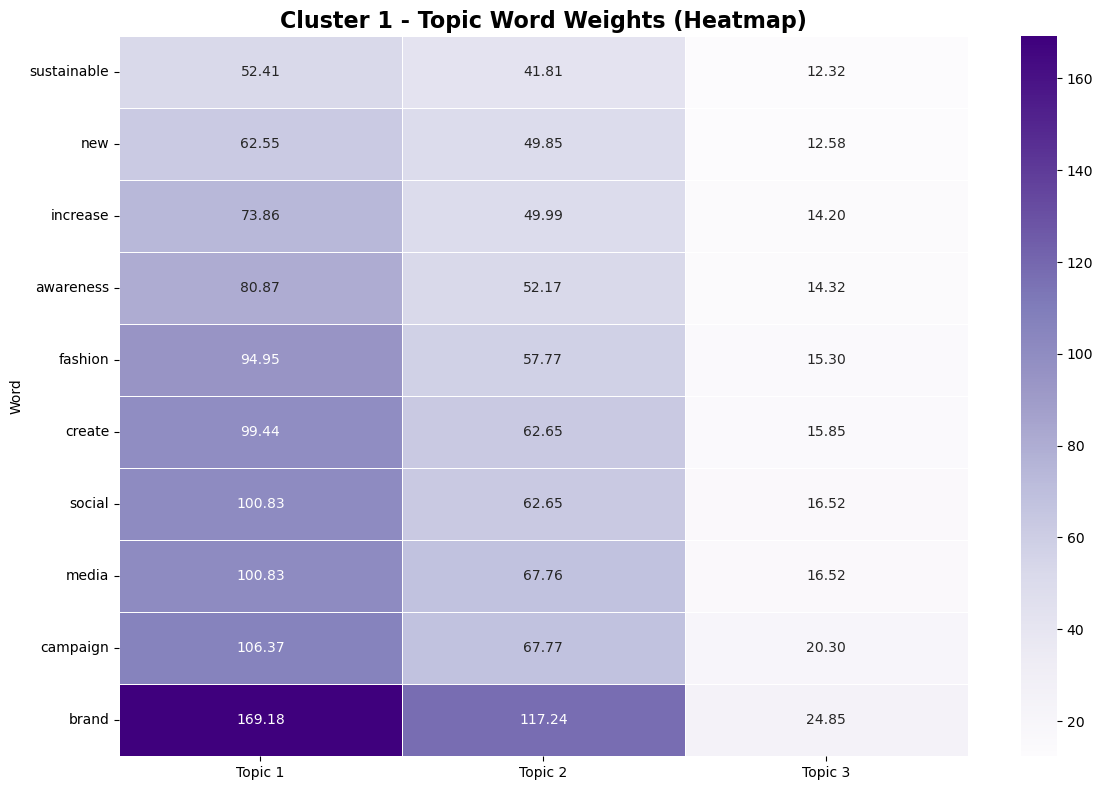


Cluster 2: Topic Modeling


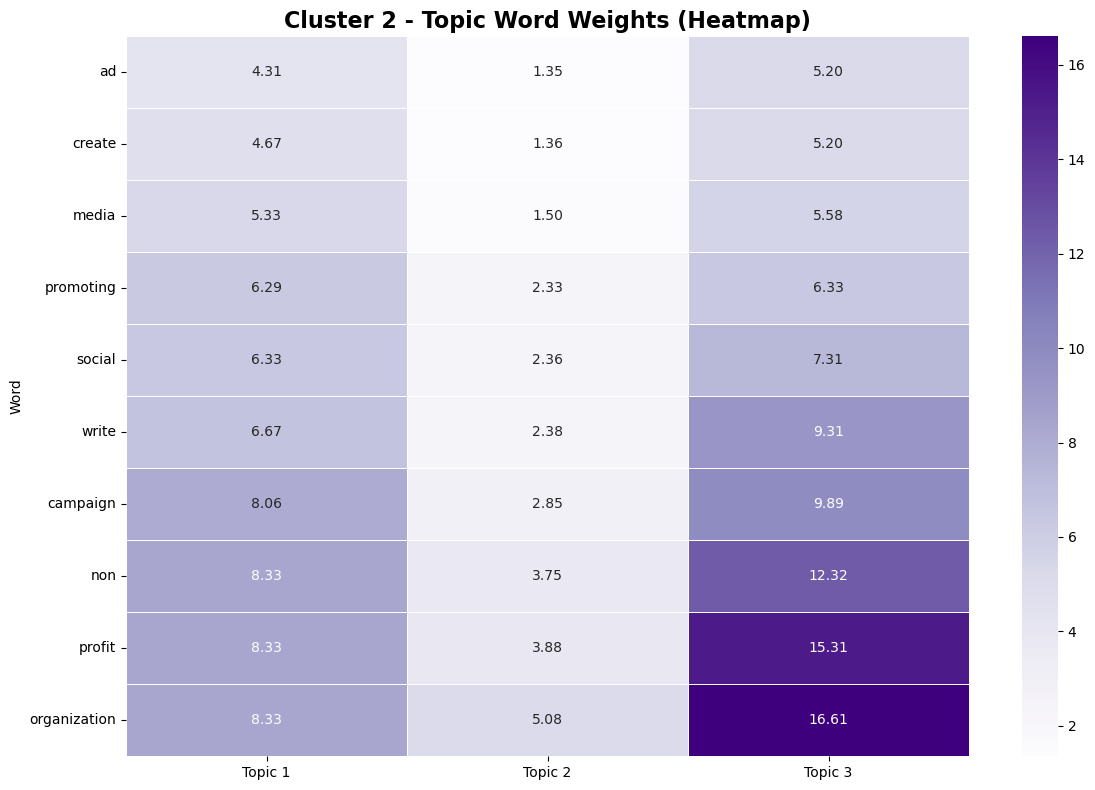


Cluster 3: Topic Modeling


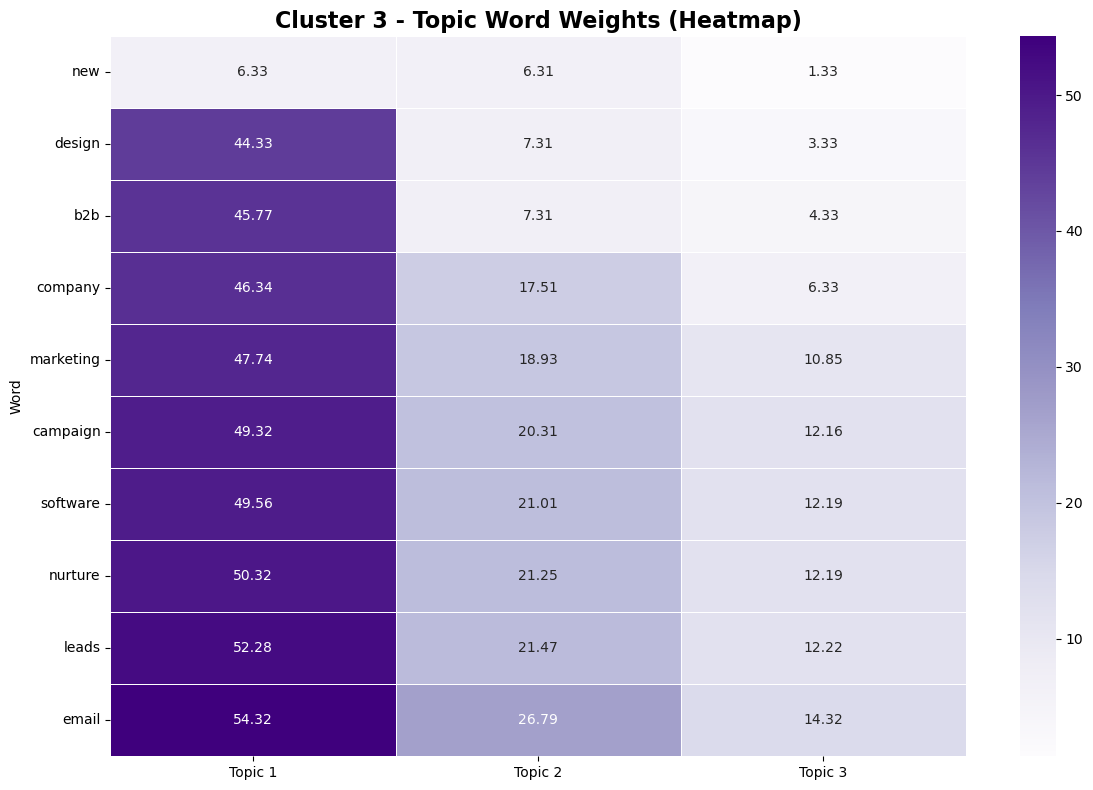


Cluster 4: Topic Modeling


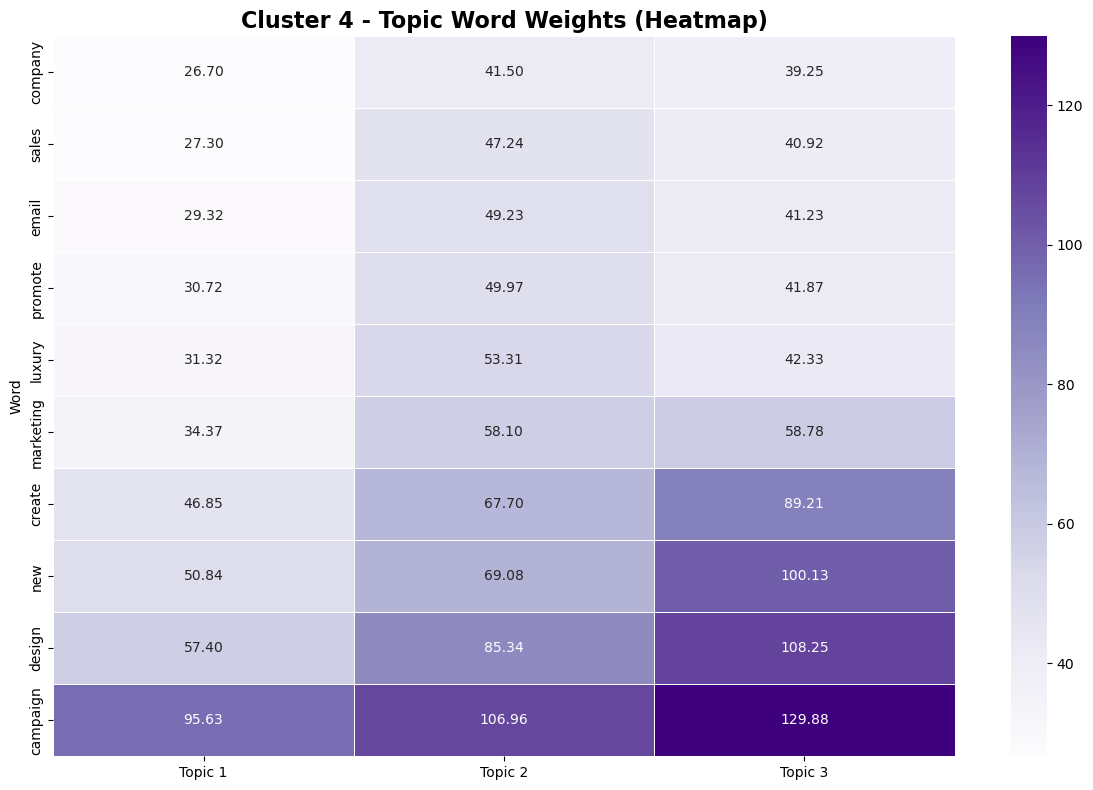

In [132]:
import seaborn as sns
import pandas as pd

# Loop through each cluster and perform topic modeling
for cluster in range(5):  # Assuming 5 clusters
    print(f"\nCluster {cluster}: Topic Modeling")
    
    # Combine all instructions for the cluster into a single string
    cluster_text = df[df['instruction_cluster'] == cluster]['instruction']
    
    # Convert text data into a document-term matrix
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(cluster_text)
    
    # Fit LDA model to the cluster's instructions
    lda = LatentDirichletAllocation(n_components=3, random_state=42)
    lda.fit(X)
    
    # Extract the top words and their weights for each topic
    n_top_words = 10
    topic_data = []
    for idx, topic in enumerate(lda.components_):
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_top_words:]]
        top_weights = topic[topic.argsort()[-n_top_words:]]
        topic_data.append(pd.DataFrame({'Word': top_words, f'Topic {idx + 1}': top_weights}))
    
    # Merge the data into a single DataFrame for heatmap
    heatmap_data = pd.concat(topic_data, axis=1)
    heatmap_data = heatmap_data.loc[:, ~heatmap_data.columns.duplicated()]  # Remove duplicate columns
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data.set_index('Word'), annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
    plt.title(f"Cluster {cluster} - Topic Word Weights (Heatmap)", fontsize=16, weight='bold')
    plt.tight_layout()
    plt.savefig(f"cluster_{cluster}_topic_heatmap.png", dpi=300, bbox_inches='tight')
    plt.show()